In [10]:
import glob

import  cv2
import matplotlib.pyplot as plt


def to_image(path_str, scale):
    sat_img = cv2.imread(path_str)
    sat_img = cv2.cvtColor(sat_img, cv2.COLOR_BGR2RGB)



    width = int(sat_img.shape[1] * scale / 100)
    height = int(sat_img.shape[0] * scale / 100)
    dim = (width, height)

    sat_img = cv2.resize(sat_img, dim, interpolation=cv2.INTER_AREA)
    return sat_img

128.89981617647058


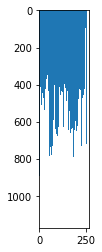

129.60957324106113


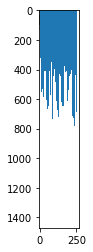

128.99506199538638


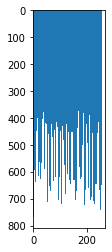

126.44184328143022


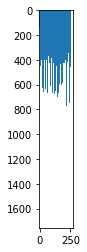

127.28582756632065


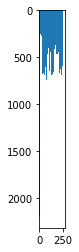

126.18647275086505


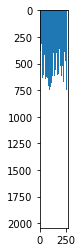

128.70485510380624


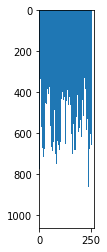

126.41207107843137


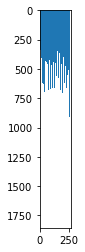

128.7478734140715


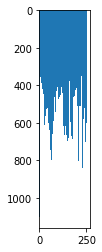

126.90473615916954


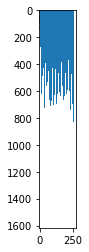

In [23]:

import albumentations

all_images = glob.glob('/ssd/cil_data_root/cil_data/training/images/*.png')[:3]

# clahe = albumentations.augmentations.transforms.CLAHE (clip_limit=4.0, tile_grid_size=(1,1), always_apply=True)

for image in all_images:
    arr = to_image(image, 34)
    #arr = clahe(image=arr)['image']

    img_yuv = cv2.cvtColor(arr, cv2.COLOR_BGR2YUV)

    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

    # convert the YUV image back to RGB format
    arr = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    plt.imshow(arr)
    print(arr.mean())

    plt.hist(arr.flatten(), bins=100)
    plt.show()
#print(arr.mean())